In [1]:
using LazySets

In [2]:
using Dates; now()

2019-03-23T16:09:13.478

In [3]:
# load packages
using Revise, MathematicalSystems, LazySets, Reachability

using Plots

## 2D model

Defining the model:

In [4]:
A = [0 1.; -1 0]
problem = IVP(LinearContinuousSystem(A), BallInf(ones(2), 0.1))

InitialValueProblem{LinearContinuousSystem{Float64,Array{Float64,2}},BallInf{Float64}}(LinearContinuousSystem{Float64,Array{Float64,2}}([0.0 1.0; -1.0 0.0]), BallInf{Float64}([1.0, 1.0], 0.1))

Solution using `BFFPSV18` algorithm:

Computing successors 100%|██████████████████████████████| Time: 0:00:02


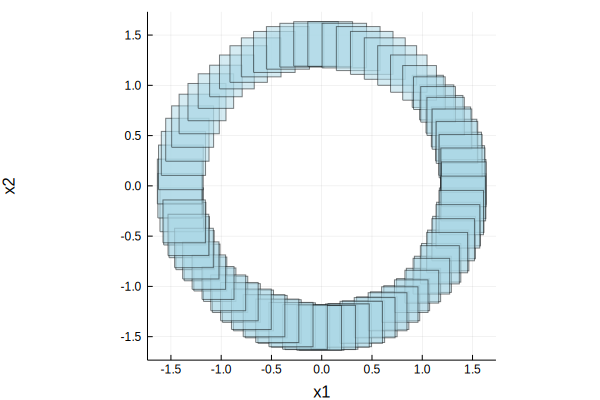

In [5]:
sol_BFFPSV18 = solve(problem, Options(:T=>10.0, :plot_vars=>[1, 2]), op=BFFPSV18(:δ=>0.1));

plot(sol_BFFPSV18, use_subindices=false, aspectratio=1, alpha=.5, color=:lightblue)

In [6]:
@btime solve($problem, Options(:T=>10.0, :plot_vars=>[1, 2]), op=BFFPSV18(:δ=>0.1));

  11.955 ms (9605 allocations: 718.39 KiB)


Solution using `GLGM06` algorithm:

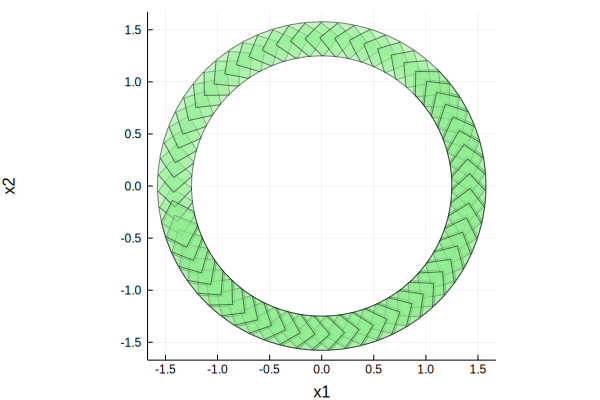

In [7]:
sol_GLGM06 = solve(problem, Options(:T=>10.0, :plot_vars=>[1, 2]), op=GLGM06(:δ=>0.1, :max_order=>5));

plot(sol_GLGM06, use_subindices=false, aspectratio=1, alpha=.5, color=:lightgreen)

In [8]:
@btime solve($problem, Options(:T=>10.0, :plot_vars=>[1, 2]), op=GLGM06(:δ=>0.1, :max_order=>5));

  11.263 ms (2033 allocations: 343.56 KiB)


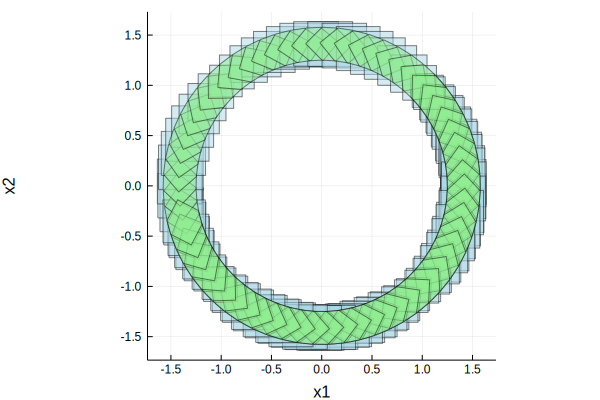

In [9]:
# plotting both solutions in the same pair of axes
plot(sol_BFFPSV18, use_subindices=false, aspectratio=1, alpha=.5, color=:lightblue)
plot!(sol_GLGM06, use_subindices=false, aspectratio=1, alpha=.5, color=:lightgreen)

Let's plot the first three images for each algorithm:

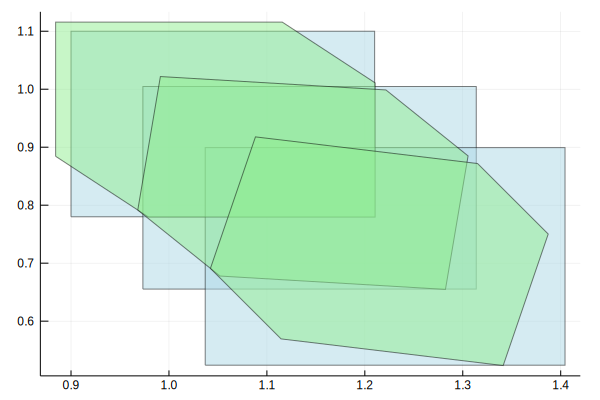

In [10]:
plot([sol_BFFPSV18.Xk[1].X,
       sol_BFFPSV18.Xk[2].X,
       sol_BFFPSV18.Xk[3].X], color=:lightblue, alpha=.5)

plot!([sol_GLGM06.Xk[1].X,
       sol_GLGM06.Xk[2].X,
       sol_GLGM06.Xk[3].X], color=:lightgreen, alpha=.5)

## Building

In [11]:
include("/Users/forets/Projects/ReachabilityBenchmarks/models/ARCH/AFF/Building/building.jl")

SafeStatesProperty{Float64}(HalfSpace{Float64}(  [25]  =  1.0, 0.0051), Float64[])

Solution using `BFFPSV18`:

In [12]:
𝑂_BLDF01 = Options(:T => time_horizon, :mode => "check", :property => pBDS01, :plot_vars=>[0, 25])
𝑂_dense_BLDF01 = Options(:vars => [25], :partition => [1:24, [25], 26:48],
                         :δ => 0.003, :block_options_init => LazySets.LinearMap)
sol_BLDF01_dense = solve(build_TV, 𝑂_BLDF01, op=BFFPSV18(𝑂_dense_BLDF01))

Computing successors 100%|██████████████████████████████| Time: 0:00:02


CheckSolution(true, -1, Options(Dict{Symbol,Any}(:property=>SafeStatesProperty{Float64}(HalfSpace{Float64}(  [25]  =  1.0, 0.0051), Float64[]),:ε_proj=>Inf,:output_function=>nothing,:n=>48,:verbosity=>"warn",:blocks=>[2],:coordinate_transformation=>"",:plot_vars=>[0, 25],:inout_map=>[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0],:set_type_proj=>Hyperrectangle…)))

Solution using `GLGM06`:

In [17]:
@time begin
𝑂_BLDF01 = Options(:T=>time_horizon, :plot_vars=>[0, 25], :project_reachset=>true)
𝑂_dense_GLGM06 = Options(:δ => 0.004, :max_order=>2)
sol_GLGM06_dense = solve(build_TV, 𝑂_BLDF01, op=GLGM06(𝑂_dense_GLGM06));
end;

  8.397529 seconds (33.29 M allocations: 11.557 GiB, 47.88% gc time)


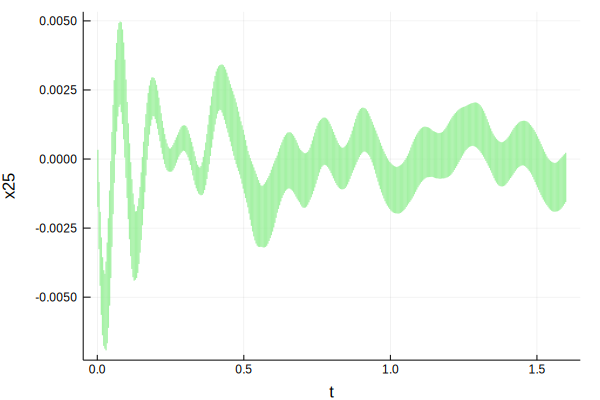

In [18]:
plot(sol_GLGM06_dense, lw=0.1, use_subindices=false, alpha=.8, color=:lightgreen, indices=1:400)

In [19]:
# smaller step size in the [0, 1] time window
@time begin
𝑂_BLDF01 = Options(:T=>1.0, :plot_vars=>[0, 25], :project_reachset=>true)
𝑂_dense_GLGM06 = Options(:δ => 0.002, :max_order=>2)
sol_GLGM06_dense = solve(build_TV, 𝑂_BLDF01, op=GLGM06(𝑂_dense_GLGM06));
end;

  0.928887 seconds (3.32 M allocations: 1.158 GiB, 33.73% gc time)


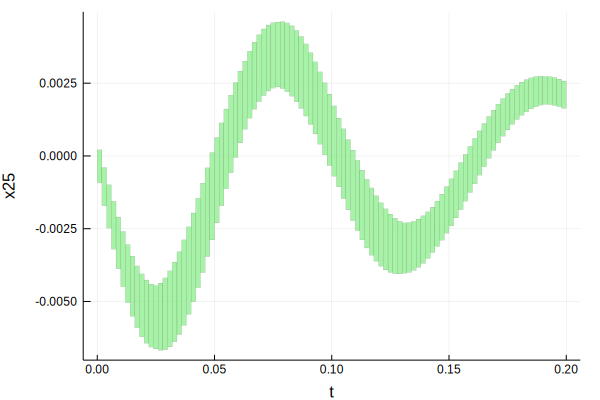

In [20]:
plot(sol_GLGM06_dense, lw=0.1, use_subindices=false, alpha=.8, color=:lightgreen, indices=1:100)